In [82]:
#Load the required libraries
from google.colab import files
import matplotlib.pyplot as plt
import cv2

In [71]:
#Importing the image
uploaded= files.upload()

Saving 04DF72FF-CD0B-4722-A48B-DAA031C58569.png to 04DF72FF-CD0B-4722-A48B-DAA031C58569.png


Function for Grayscaling the image using : Y= 0.299 R + 0.587 G + 0.114 B



In [73]:
import numpy as np
def grayscale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

The 'colordodge' function lightens the bottom layer depending on the value of the top layer and the blurred image highlights the boldest edges.
Gaussian filter blurs the inverted image by adjusting the variance (sigma).A higher sigma values means more blurring.
Grayscale images  can be inverted by subtracting from 255 (they are 8-bit with 256 tones).



In [ ]:
def colordodge(front,back):
    result=front*255/(255-back) 
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')

In [74]:
#Perfroming the previously defined steps
image= cv2.imread('04DF72FF-CD0B-4722-A48B-DAA031C58569.png')
g=grayscale(image)
inv = 255-g
import scipy.ndimage
b = scipy.ndimage.filters.gaussian_filter(inv,sigma=10)
final= colordodge(b,g)

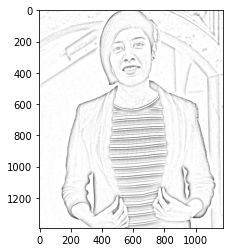

In [80]:
%matplotlib inline 
plt.imshow(final, cmap="gray")